In [2]:
### Author : Prasad Meesala
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, metrics, model_selection, datasets

In [3]:
# Collecting the data

data = datasets.load_digits()
print(dir(data))

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df['target_names'] = df['target'].apply(lambda x : data.target_names[x])
df.head()

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4


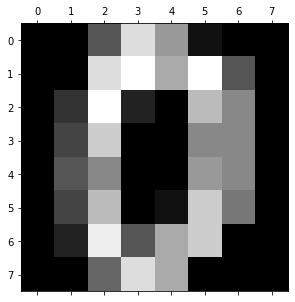

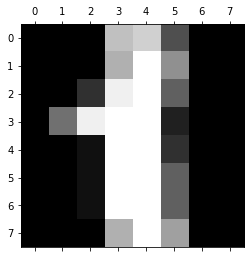

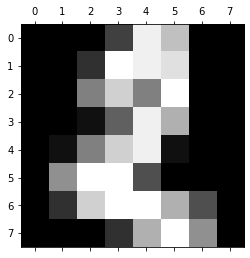

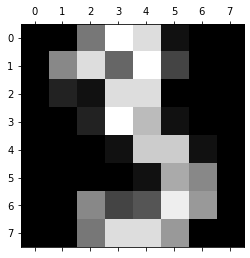

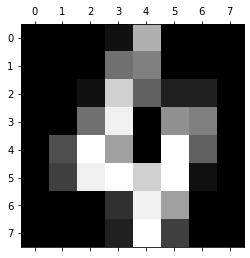

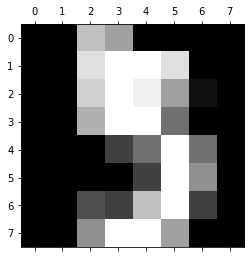

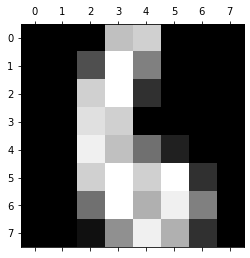

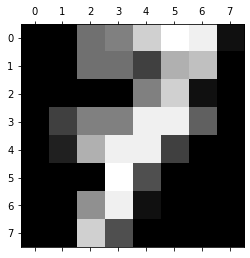

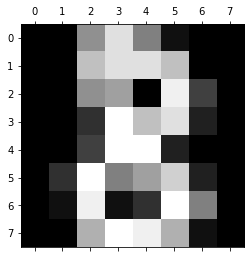

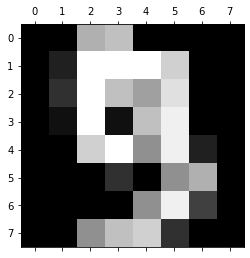

In [4]:
# Visualizing the data

for x in data.images[:10]:
    plt.matshow(x)
    plt.gray()
    plt.show()


In [26]:
# Splitting the data into testing and training data

X = df.drop(['target', 'target_names'], axis = 1).values
y = df['target'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [28]:
# Training the model

model = ensemble.RandomForestClassifier(n_estimators = 10)

model.fit(X_test, y_test)

RandomForestClassifier(n_estimators=10)

In [27]:
# Testing the model and predicting the result

y_predicted = model.predict(X_test)
print(y_predicted)

[6 0 2 3 7 3 2 1 4 9 5 8 7 2 2 4 9 5 4 0 6 2 1 6 4 5 0 2 6 4 6 2 6 5 1 8 1
 5 2 1 0 8 0 8 0 4 6 2 6 0 1 7 7 9 8 1 1 0 3 9 3 8 6 6 8 8 2 1 3 1 9 5 9 9
 1 3 5 9 1 4 2 7 5 1 3 6 4 0 1 4 7 8 9 8 7 1 1 8 0 1 0 7 7 4 2 3 1 6 0 0 4
 5 4 2 0 8 4 7 4 4 3 3 5 4 0 5 5 0 3 4 6 0 3 6 4 5 8 1 7 1 5 4 9 0 9 2 8 7
 4 9 8 7 1 2 3 9 1 1 5 3 5 5 0 6 6 7 0 0 0 4 0 6 3 3 0 3 6 1 1 4 5 5 9 6 3
 1 9 5 7 8 1 7 3 9 5 6 2 8 9 7 3 2 1 8 6 6 0 6 5 9 8 7 8 4 3 3 7 3 2 7 2 0
 7 0 0 1 9 0 3 4 0 8 8 1 7 3 8 0 3 8 4 4 4 8 2 9 1 4 6 7 5 4 6 1 3 2 4 6 3
 7 4 0 4 9 8 2 2 1 0 3 8 5 0 0 0 7 3 5 1 6 5 9 9 8 7 9 5 1 0 7 1 9 5 9 1 0
 8 1 1 1 2 7 1 3 0 1 7 3 1 9 6 3 9 1 7 1 4 0 5 3 0 7 1 3 1 7 1 0 1 4 6 0 1
 4 3 3 2 2 9 9 1 9 5 8 2 0 0 3 2 1 5 1 4 3 0 1 6 9 9 7]


In [29]:
# Checking the accuracy of the model

print("Accuracy :", model.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predicted))

Accuracy : 1.0
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.61      0.85      0.71        39
           2       1.00      0.74      0.85        38
           3       0.72      0.76      0.74        37
           4       0.89      0.97      0.93        33
           5       0.81      0.76      0.78        33
           6       0.97      0.94      0.95        31
           7       0.88      0.97      0.92        30
           8       0.70      0.50      0.58        42
           9       0.67      0.69      0.68        32

    accuracy                           0.81       360
   macro avg       0.82      0.81      0.81       360
weighted avg       0.82      0.81      0.80       360

